Predict future values using current and past data
Three terms to considered:
1. Seasonality 
2. Trend
3. Unexpected Events

Time series - Additive or Exponential

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import datetime as dt

In [2]:
df = pd.read_csv('Data/yahoo_stock.csv')
df = df[['Date','High']]
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d')
#del df['Date']
df

,Date,High
0,2015-11-23,2095.610107
1,2015-11-24,2094.120117
2,2015-11-25,2093.000000
3,2015-11-26,2093.000000
4,2015-11-27,2093.290039
...,...,...
1820,2020-11-16,3628.510010
1821,2020-11-17,3623.110107
1822,2020-11-18,3619.090088
1823,2020-11-19,3585.219971


In [3]:
#df = df[df.index<pd.to_datetime('2018-01-01',format = '%Y-%m-%d')]

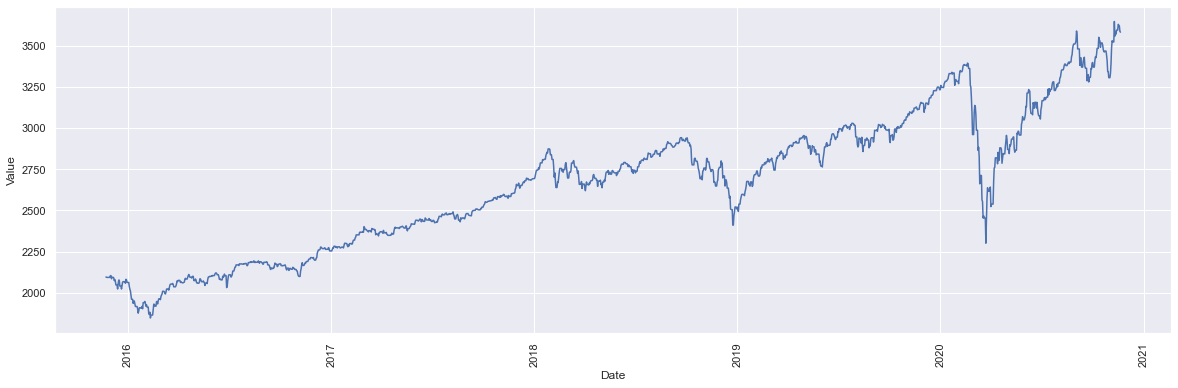

In [4]:
sns.set()
plt.figure(figsize = [20,6])
plt.xticks(rotation = 90)
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Date'],df['High'])


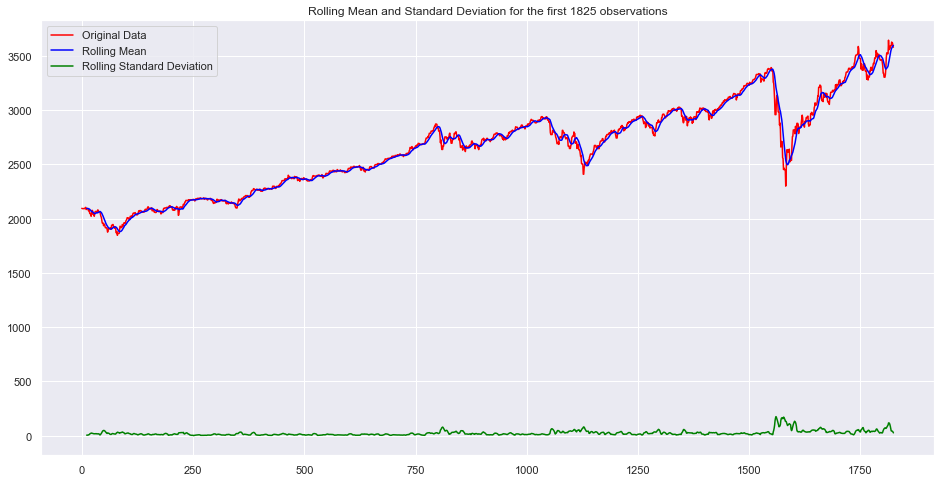

Test Statistic                   -0.713598
p-value                           0.843196
#Lags Used                       25.000000
Number of Observations Used    1799.000000
Critical Value (1%)              -3.433990
Critical Value (5%)              -2.863148
Critical Value (10%)             -2.567626
dtype: float64


In [5]:
def stationarity(ts, window, n):
    roll_mean = ts.rolling(window).mean()
    roll_std = ts.rolling(window).std()
    
    plt.figure(figsize = (16, 8))
    
    plt.plot(ts[:n], label = 'Original Data', color = 'red')
    plt.plot(roll_mean[:n], label = 'Rolling Mean', color = 'blue')
    plt.plot(roll_std[:n], label = 'Rolling Standard Deviation', color = 'green')
    plt.title("Rolling Mean and Standard Deviation for the first %d observations"%(n))
    plt.legend(loc = 'best')
    plt.show(block = False)
    
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
stationarity(df['High'],12,len(df))

In [6]:
#ts_log = np.log(df)
#ts_log_diff = ts_log - ts_log.shift() #differencing step
#ts_log_diff.dropna(inplace = True)

#stationarity(ts_log_diff,365,len(ts_log_diff))

In [7]:
#df.dropna(inplace=True)
#stationarity(df['lag 1'],365,len(df['lag 1']))

In [8]:
df['fd'] = df['High'].diff()
df.dropna(inplace = True)

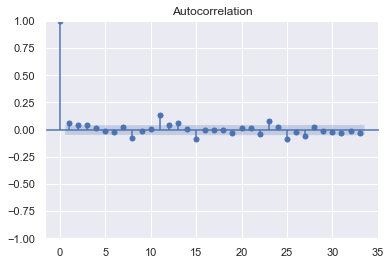

In [9]:
acf_plot = plot_acf(df['fd'])

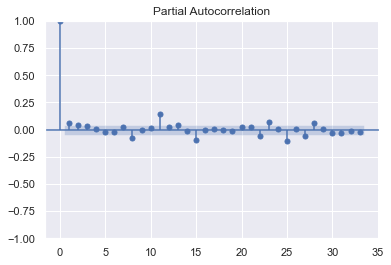

In [10]:
pacf_plot = plot_pacf(df['fd'],method = 'ols')

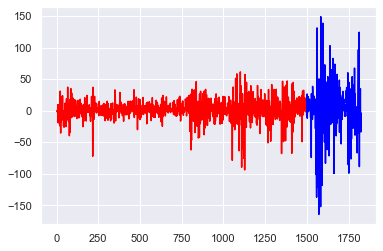

In [11]:
train = df[df['Date'] < pd.to_datetime('2020-01-01',format = '%Y-%m-%d')]
test = df[df['Date'] >= pd.to_datetime('2020-01-01',format = '%Y-%m-%d')]
plt.plot(train['fd'],c = 'red')
plt.plot(test['fd'],c = 'blue')

In [12]:
df.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824],
           dtype='int64', length=1824)

In [13]:
df['Date'] = df['Date'].map(dt.datetime.toordinal)

In [14]:
df

,Date,High,fd
1,735926,2094.120117,-1.489990
2,735927,2093.000000,-1.120117
3,735928,2093.000000,0.000000
4,735929,2093.290039,0.290039
5,735930,2093.290039,0.000000
...,...,...,...
1820,737745,3628.510010,34.850098
1821,737746,3623.110107,-5.399902
1822,737747,3619.090088,-4.020020
1823,737748,3585.219971,-33.870117


In [15]:
#for i in np.arange(1,len(df)+1):
#print(dt.datetime.fromordinal(df['Date'][i]))

In [23]:
df['lag 1'] = df['fd'].shift()
df.dropna(inplace = True)
df.head(20)

,Date,High,fd,lag 1
3,735928,2093.000000,0.000000,-1.120117
4,735929,2093.290039,0.290039,0.000000
5,735930,2093.290039,0.000000,0.290039
6,735931,2093.290039,0.000000,0.000000
7,735932,2093.810059,0.520020,0.000000
8,735933,2103.370117,9.560059,0.520020
9,735934,2104.270020,0.899902,9.560059
10,735935,2085.000000,-19.270020,0.899902
11,735936,2093.840088,8.840088,-19.270020
12,735937,2093.840088,0.000000,8.840088


In [24]:

a = 0.
b = 0.0
c = 0.0
L = 0.01
epochs = 2
for i in range(epochs):
    y_pred_t_1 = -1
    for j in np.arange(2,len(df)+2):
        
        y_pred = a+b*df['lag 1'][j]-c*y_pred_t_1
        Da = 2*(a+b*df['lag 1'][j]-c*y_pred_t_1-df['fd'][j])
        Db = 2*(a+b*df['lag 1'][j]-c*y_pred_t_1-df['fd'][j])*df['lag 1'][j]
        Dc = 2*(a+b*df['lag 1'][j]-c*y_pred_t_1-df['fd'][j])*y_pred_t_1*(-1)
        a = a - L*Da
        b = b - L*Db
        c = c - L*Dc
        print(i,j,y_pred,Da,Db,Dc,a,b,c)
        y_pred_t_1 = y_pred



KeyError: 2